# Доверительные интервалы

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
def interval_m_normal(x, alpha=0.05):
    n = len(x)
    x_mean = np.mean(x)
    s = np.std(x, ddof=1)
    #s = np.std(x)
    t = stats.t.ppf(1 - alpha/2, df=n-1)
    margin_error = t * s / np.sqrt(n-1)
    return (x_mean - margin_error, x_mean + margin_error)

def interval_s_normal(x, alpha=0.05):
    n = len(x)
    s = np.std(x, ddof=1)
    #s = np.std(x)
    chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
    chi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
    lower = s * np.sqrt(n-1) / np.sqrt(chi2_upper)
    upper = s * np.sqrt(n-1) / np.sqrt(chi2_lower)
    return (lower, upper)

def interval_m_asymp(x, alpha=0.05):
    n = len(x)
    x_mean = np.mean(x)
    s = np.std(x, ddof=1)
    #s = np.std(x)
    u = stats.norm.ppf(1 - alpha/2)
    margin_error = u * s / np.sqrt(n)
    return (x_mean - margin_error, x_mean + margin_error)

def interval_s_asymp(x, alpha=0.05):
    n = len(x)
    s = np.std(x, ddof=1)
    #s = np.std(x)
    m4 = np.mean((x - np.mean(x))**4)
    e = m4 / (s**4) - 3
    u = stats.norm.ppf(1 - alpha/2)
    U = u * np.sqrt((e + 2) / n)
    lower = s * (1 + U)**(-0.5)
    upper = s * (1 - U)**(-0.5)
    return (lower, upper)

# Для нормального распределения (+асимптотический подход)


Sample size n = 20
Normal:
M in:  -0.8270307946220352 0.4188904660085862
S in:  0.9866359026119629 1.8948989037550403
Asymp:
M in:  -0.7726563124220827 0.36451598380863376
S in:  1.0443478739265273 1.9196559743125985

Sample size n = 100
Normal:
M in:  -0.03910263560405752 0.30359443062399777
S in:  0.7544087805432396 0.9981448519697474
Asymp:
M in:  -0.03615985550046222 0.30065165052040244
S in:  0.7623403548884546 1.0058852775886047


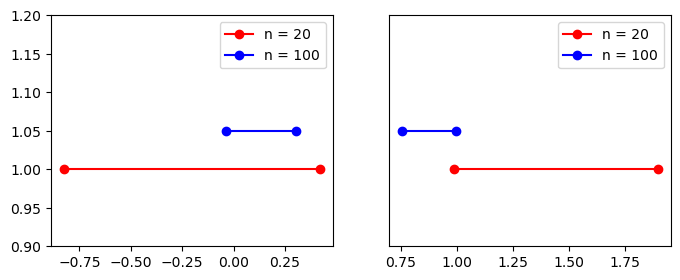

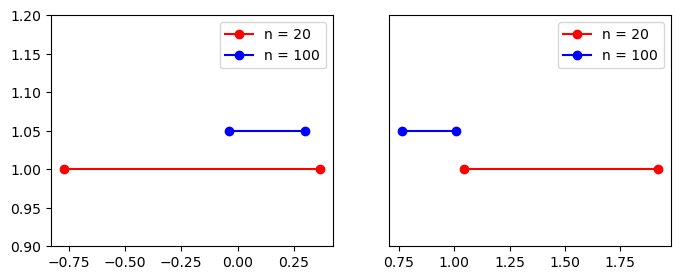

In [12]:
m_a=[]
m_n=[]
s_a=[]
s_n=[]
def print_(n, x):
    print(f"\nSample size n = {n}")
    
    m_normal = interval_m_normal(x)
    sigma_normal = interval_s_normal(x)
    m_n.append(list(m_normal))
    s_n.append(list(sigma_normal))
    m_asymp = interval_m_asymp(x)
    sigma_asymp = interval_s_asymp(x)
    m_a.append(m_asymp)
    s_a.append(sigma_asymp)
    
    print("Normal:")
    print("M in: ", m_normal[0], m_normal[1])
    print("S in: ", sigma_normal[0], sigma_normal[1])
    
    print("Asymp:")
    print("M in: ", m_asymp[0], m_asymp[1])
    print("S in: ", sigma_asymp[0], sigma_asymp[1])
  
n = 20
sample1 = np.random.normal(loc=0, scale=1, size=n)
print_(n, sample1)

n = 100
sample2 = np.random.normal(loc=0, scale=1, size=n)
print_(n, sample2)

#графики
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(3)

ax1.set_ylim(0.9, 1.2)
ax1.plot(m_n[0], [1, 1], 'ro-', label='n = 20')
ax1.plot(m_n[1], [1.05, 1.05], 'bo-', label='n = 100')
ax1.legend()
plt.yticks([])

ax2.set_ylim(0.9, 1.2)
ax2.plot(s_n[0], [1, 1], 'ro-', label='n = 20')
ax2.plot(s_n[1], [1.05, 1.05], 'bo-', label='n = 100')
ax2.legend()
plt.yticks([])

plt.show()

#графики для ассимптотического
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(3)

ax1.set_ylim(0.9, 1.2)
ax1.plot(m_a[0], [1, 1], 'ro-', label='n = 20')
ax1.plot(m_a[1], [1.05, 1.05], 'bo-', label='n = 100')
ax1.legend()
plt.yticks([])

ax2.set_ylim(0.9, 1.2)
ax2.plot(s_a[0], [1, 1], 'ro-', label='n = 20')
ax2.plot(s_a[1], [1.05, 1.05], 'bo-', label='n = 100')
ax2.legend()
plt.yticks([])

plt.show()


# Твины

In [23]:
def twin(m_l, m_u, s_l, s_u):
    x_inn_l = round(m_l + s_l, 3)
    x_inn_u = round(m_u - s_l, 3)

    x_out_l = round(m_l - s_u, 3)
    x_out_u = round(m_u + s_u, 3)

    return (x_inn_l, x_inn_u), (x_out_l, x_out_u)
print("Normal 20: Xinn Xout")
print(twin(m_n[0][0], m_n[0][1], s_n[0][0], s_n[0][1]))
print("Normal 100 Xinn Xout")
print(twin(m_n[1][0], m_n[1][1], s_n[1][0], s_n[1][1]))
print("Asymptotic 20 Xinn Xout")
print(twin(m_a[0][0], m_a[0][1], s_a[0][0], s_a[0][1]))
print("Asymptotic 100 Xinn Xout")
print(twin(m_a[1][0], m_a[1][1], s_a[1][0], s_a[1][1]))


Normal 20: Xinn Xout
((0.16, -0.568), (-2.722, 2.314))
Normal 100 Xinn Xout
((0.715, -0.451), (-1.037, 1.302))
Asymptotic 20 Xinn Xout
((0.272, -0.68), (-2.692, 2.284))
Asymptotic 100 Xinn Xout
((0.726, -0.462), (-1.042, 1.307))
